# ✈️ Flight Fare Prediction Using Machine Learning

## Problem Statement
Flight ticket prices are very hard to predict. The price of a flight today may change tomorrow even for the same route and airline. This makes travel planning difficult for customers and pricing decisions challenging for airlines.

In this project, we use Machine Learning techniques to analyze historical flight data and predict future flight ticket prices. This system can help customers plan their journey in advance and help airlines maintain suitable pricing strategies.

## Objectives

1. Perform Exploratory Data Analysis on the flight dataset.

2. Identify important factors affecting flight prices.

3. Build multiple Machine Learning models.

4. Compare model performance.

5. Select the best model for production.

## Dataset Description

The dataset contains information about flight journeys, airlines, routes, stops, duration, and ticket prices.

## Attribute Information

* Airline: Name of the airline
* Date_of_Journey: Date of travel
* Source: Journey starting city
* Destination: Journey ending city
* Route: Flight route
* Arrival_Time: Arrival time
* Duration: Total travel time
* Total_Stops: Number of stops
* Additional_Info: Extra services
* Price: Flight ticket price

## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [27]:
df = pd.read_excel(r"C:\Users\NILESH\Downloads\Flight_Fare.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic Data Exploration

In [28]:
df.shape

(10683, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [30]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Check Missing Values

In [31]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Handle Missing Values

In [32]:
df.dropna(inplace=True)

## Feature Engineering

### Date of Journey

In [33]:
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df.drop("Date_of_Journey", axis=1, inplace=True)

In [34]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


### Arrival Time

In [35]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop("Arrival_Time", axis=1, inplace=True)

In [36]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,14,10


### Duration Conversion

In [37]:
# Convert Duration into minutes

def convert_duration(duration):
    duration = duration.strip()
    
    hours = 0
    minutes = 0
    
    if "h" in duration:
        hours = int(duration.split("h")[0])
        duration = duration.split("h")[1]
        
    if "m" in duration:
        minutes = int(duration.split("m")[0].strip())
        
    return hours * 60 + minutes

df["Duration"] = df["Duration"].apply(convert_duration)

In [38]:
df["Duration"].head(10)

0     170
1     445
2    1140
3     325
4     285
5     145
6     930
7    1265
8    1530
9     470
Name: Duration, dtype: int64

### Total Stops

In [39]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
df["Total_Stops"] = df["Total_Stops"].replace("non-stop", "0 stop")
df["Total_Stops"] = df["Total_Stops"].fillna("0 stop")
df["Total_Stops"] = df["Total_Stops"].str.split().str[0].astype(int)

In [41]:
df["Total_Stops"].head(10)

0    0
1    2
2    2
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Total_Stops, dtype: int64

### Drop Unnecessary Columns

In [42]:
df.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [43]:
df

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,22:20,170,0,3897,24,3,1,10
1,Air India,Kolkata,Banglore,05:50,445,2,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,09:25,1140,2,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,18:05,325,1,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,285,1,13302,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,150,0,4107,9,4,22,25
10679,Air India,Kolkata,Banglore,20:45,155,0,4145,27,4,23,20
10680,Jet Airways,Banglore,Delhi,08:20,180,0,7229,27,4,11,20
10681,Vistara,Banglore,New Delhi,11:30,160,0,12648,1,3,14,10


### Encoding Categorical Features

In [44]:
le = LabelEncoder()

categorical_columns = ["Airline", "Source", "Destination"]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [45]:
df[["Airline", "Source", "Destination"]].head()

,Airline,Source,Destination
0,3,0,5
1,1,3,0
2,4,2,1
3,3,3,0
4,3,0,5


In [46]:
df.dtypes

Airline           int64
Source            int64
Destination       int64
Dep_Time         object
Duration          int64
Total_Stops       int64
Price             int64
Journey_Day       int32
Journey_Month     int32
Arrival_Hour      int32
Arrival_Min       int32
dtype: object

## Exploratory Data Analysis

### Price Distribution

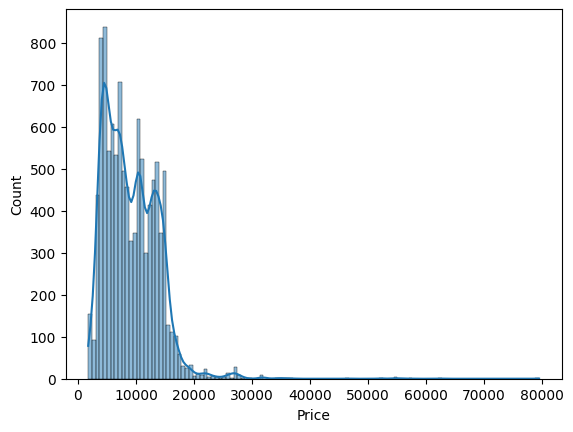

In [47]:
sns.histplot(df["Price"], kde=True)
plt.show()

Most flight ticket prices are low, while only a few flights are very expensive. This shows that prices vary a lot and are not evenly distributed.

### Airline vs Price

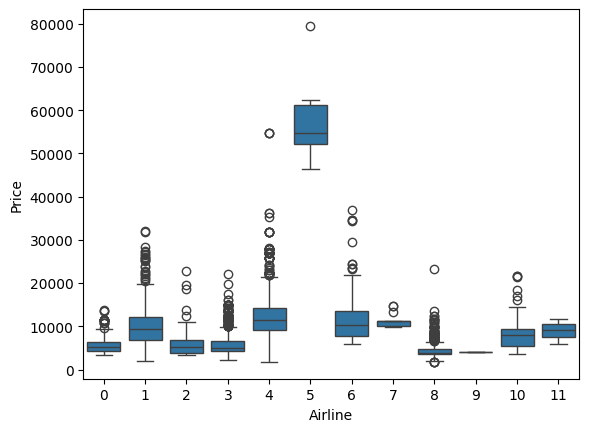

In [48]:
sns.boxplot(x="Airline", y="Price", data=df)
plt.show()

Flight ticket prices vary significantly across different airlines. Some airlines consistently have higher fares, while others offer more budget-friendly prices. This shows that the choice of airline has a strong impact on flight pricing.

### Total Stops vs Price

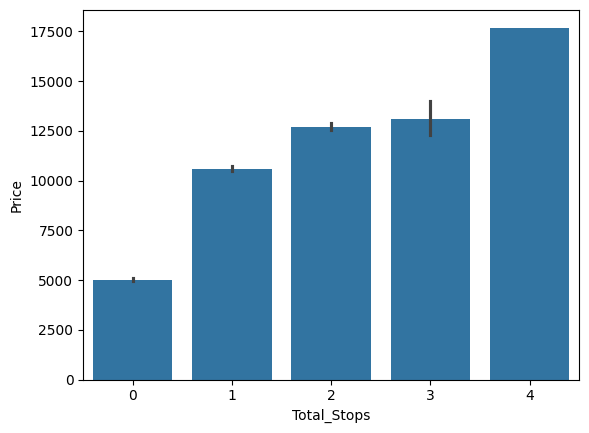

In [49]:
sns.barplot(x="Total_Stops", y="Price", data=df)
plt.show()

Flight prices increase as the number of stops increases. Direct flights are the cheapest, while flights with multiple stops are more expensive. This shows that the number of stops strongly affects flight pricing.

## Observations from EDA

* Flight price varies significantly across airlines.
* Flights with more stops generally cost more.
* Duration has a strong impact on ticket price.

In [51]:
df.select_dtypes(include="object").columns

Index(['Dep_Time'], dtype='object')

In [52]:
# Convert Departure Time
if "Dep_Time" in df.columns:
    df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
    df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
    df.drop("Dep_Time", axis=1, inplace=True)

# Convert Arrival Time
if "Arrival_Time" in df.columns:
    df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
    df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
    df.drop("Arrival_Time", axis=1, inplace=True)

In [53]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

## Train Test Split

In [54]:
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
X.shape, y.shape

((10682, 11), (10682,))

In [56]:
X_train.shape, X_test.shape

((8545, 11), (2137, 11))

In [57]:
y_train.shape, y_test.shape

((8545,), (2137,))

In [58]:
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [59]:
y_train.head()

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
Name: Price, dtype: int64

In [60]:
y_test.head()

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
Name: Price, dtype: int64

In [61]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Journey_Day', 'Journey_Month', 'Arrival_Hour', 'Arrival_Min',
       'Dep_Hour', 'Dep_Min'],
      dtype='object')

In [62]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (8545, 11)
Test size: (2137, 11)


## Model 1: Linear Regression

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

MAE: 2448.082055828988
RMSE: 3480.8197875183537
R2 Score: 0.43808205437241265


## Model 2: Decision Tree Regressor

In [64]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))

MAE: 1350.3008501013883
RMSE: 2548.745056272595
R2 Score: 0.6987253319343825


## Model 3: Random Forest Regressor

In [65]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

MAE: 1183.61288627975
RMSE: 2090.0849597863007
R2 Score: 0.7974008103192948


## Best Model

Random Forest Regressor gives the best performance due to:
* Lower error values
* Better handling of complex data
* Reduced overfitting

## Challenges Faced and Solutions

**Missing Values:**
Dropped rows with missing values to avoid incorrect predictions.

**Duration Format:**
Converted text duration into numeric minutes.

**Categorical Data:**
Used Label Encoding to convert text data into numbers.

**Overfitting:**
Decision Tree overfitted the data. Random Forest reduced overfitting.

## Conclusion

In this project, flight fare data was successfully analyzed using exploratory data analysis techniques. Important factors influencing flight prices were identified, such as airline, number of stops, and journey duration. Multiple machine learning models were built and compared based on their performance. Among all the models, the Random Forest Regressor performed the best. The final model can effectively help in predicting future flight prices and assist customers in planning their journeys better.